# <center> Домашнее задание № 2 (демо).  <br> Визуальный анализ данных о публикациях на Хабрахабре </center>

In [6]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('../data/howpop_train.csv')

In [8]:
data.head().T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


In [9]:
data.drop(filter(lambda c: c.endswith('_lognorm'), data.columns), 
        axis = 1,
        inplace = True)

In [5]:
data.describe().T

/Users/ilchenkoslava/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,NaN,NaN,NaN,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,NaN,NaN,NaN,445.0


In [6]:
data.describe(include=['object', 'bool']).T

,count,unique,top,freq
url,134137,134137,https://geektimes.ru/company/highscreen/blog/2...,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [7]:
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [8]:
data['published'] = pd.to_datetime(data.published, yearfirst = True)

In [9]:
data['year'] = [d.year for d in data.published]
data['month'] = [d.month for d in data.published]

data['dayofweek'] = [d.isoweekday() for d in data.published]
data['hour'] = [d.hour for d in data.published]

##### 1. В каком месяце (и какого года) было больше всего публикаций?
Март 2015.

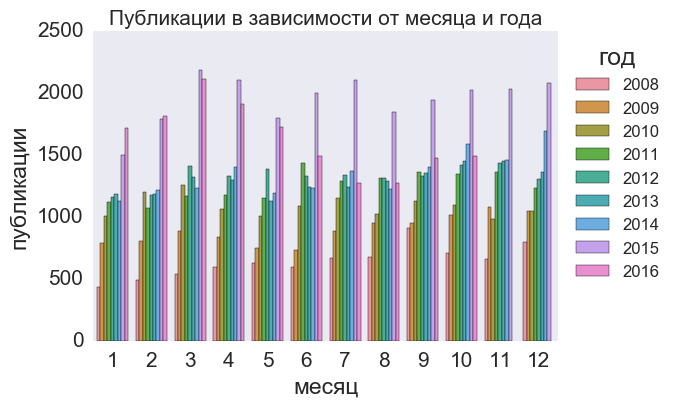

In [77]:
sns1 = sns.countplot(x='month', hue='year', data=data)
sns1.set_title('Публикации в зависимости от месяца и года', fontsize=15)
sns1.set_xlabel('месяц')
sns1.set_ylabel('публикации')
sns1.legend(title='год', fontsize=12, loc='upper right', bbox_to_anchor=(1.25, 1))

##### 2. Проанализируйте публикации в месяце из предыдущего вопроса¶
Один или несколько дней сильно выделяются из общей картины - верно.
На хабре всегда больше статей, чем на гиктаймсе - неверно.
По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей - верно.

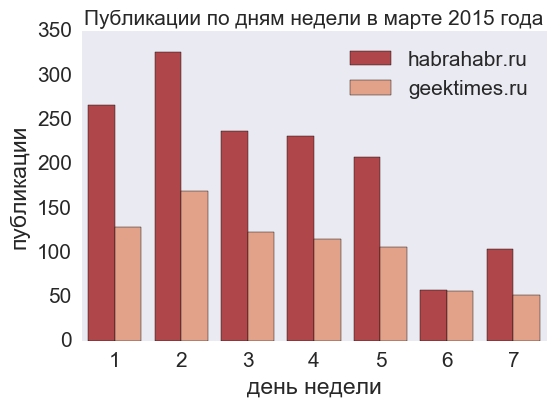

In [48]:
sns2 = sns.countplot(x='dayofweek', hue='domain', data=data[(data['month'] == 3) & (data['year'] == 2015)])
sns2.set_title('Публикации по дням недели в марте 2015 года', fontsize=15)
sns2.set_xlabel('день недели')
sns2.set_ylabel('публикации')
sns2.legend(['habrahabr.ru', 'geektimes.ru'])

##### 3. Когда лучше всего публиковать статью?¶
Больше всего просмотров набирают статьи, опубликованные в 12 часов дня - неверно.
У опубликованных в 10 утра постов больше всего комментариев - неверно.
Больше всего просмотров набирают статьи, опубликованные в 6 часов утра - верно.
Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера - неверно.
На хабре дневные статьи комментируют чаще, чем вечерние - неверно.

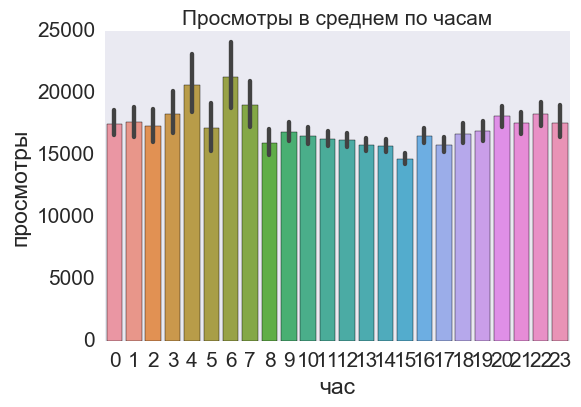

In [34]:
sns31 = sns.barplot(x='hour', y='views', data=data)
sns31.set_xlabel('час')
sns31.set_title('Просмотры в среднем по часам', fontsize=15)
sns31.set_ylabel('просмотры')

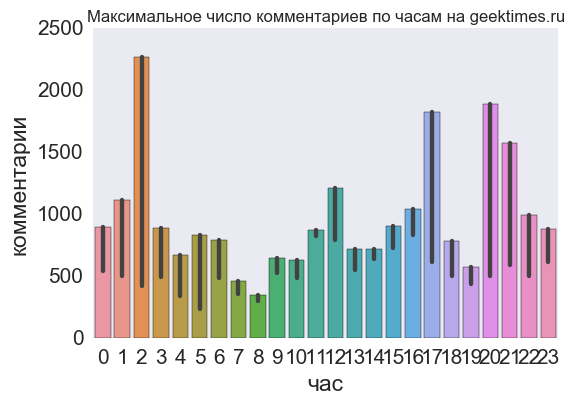

In [38]:
sns32 = sns.barplot(x='hour', y='comments', data=data[data['domain'] == 'geektimes.ru'], estimator=lambda x: max(x))
sns32.set_title('Максимальное число комментариев по часам на geektimes.ru', fontsize=12)
sns32.set_xlabel('час')
sns32.set_ylabel('комментарии')


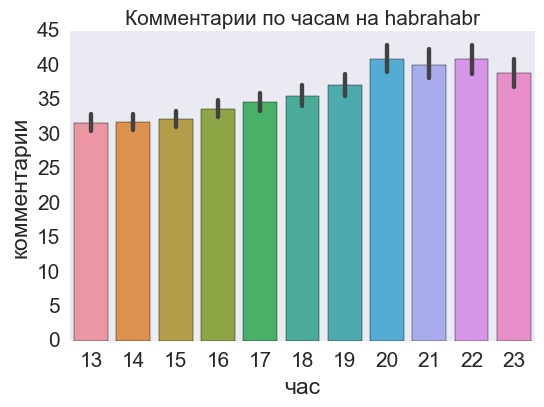

In [40]:
sns33 = sns.barplot(x='hour', y='comments', data=data[(data['domain'] == 'habrahabr.ru') & (data['hour'] > 12)]) 
sns33.set_title('Комментарии по часам на habrahabr', fontsize=15)
sns33.set_xlabel('час')
sns33.set_ylabel('комментарии')

##### 4. Кого из топ-20 авторов (по числу статей) чаще всего минусуют?
Mithgol.

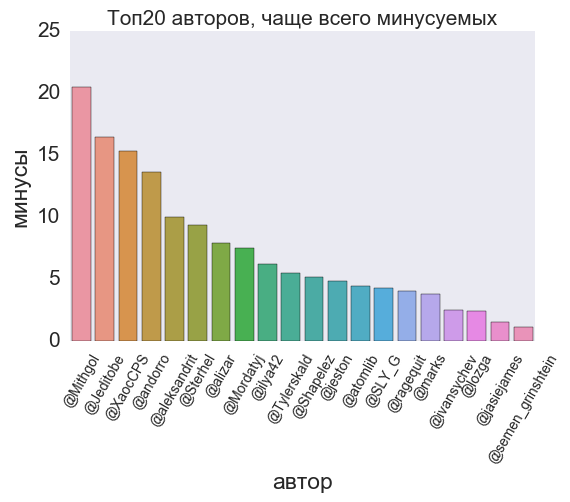

In [104]:
new = data.groupby('author')['title'].count().reset_index(name='count').sort_values(by='count', ascending=False).head(20)
sns4 = sns.barplot(x='author', y='mean', data=data[data['author'].isin(new['author'])].groupby('author')['votes_minus'].mean().reset_index(name='mean')\
    .sort_values(by='mean', ascending=False))
sns4.set_xticklabels(sns_plot.get_xticklabels(), rotation=60, fontsize=10)
sns4.set_title('Топ20 авторов, чаще всего минусуемых', fontsize=15)
sns4.set_xlabel('автор')
sns4.set_ylabel('минусы')

##### 5. Сравните субботы и понедельники. Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?
Нет.

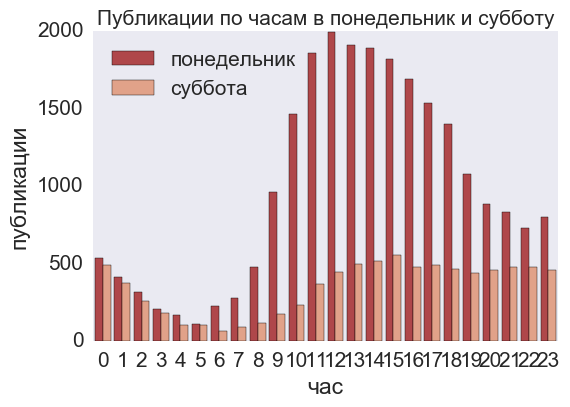

In [78]:
sns5 = sns.countplot(x='hour', hue='dayofweek', data=data[(data['dayofweek'] == 1) | (data['dayofweek'] == 6)])
sns5.set_title('Публикации по часам в понедельник и субботу', fontsize=15)
sns5.set_xlabel('час')
sns5.set_ylabel('публикации')
sns5.legend(['понедельник', 'суббота'], loc='upper left')